# Введение в нейронные сети

## Эпизод 2а: Многослойный персептрон на TensorFlow и Keras

Дмитрий Сошников | dmitri@soshnikov.com

## Нейросетевые фреймворки

Мы видели, что для обучения нейросетей нужно:
* Быстро умножать матрицы (тензоры)
* Считать производные для вычисления градиента для метода обратного распространения ошибки

Что позволяют делать нейросетевые фреймворки:
* Оперировать с тензорами, как на CPU, так и на GPU
* Автоматически вычислять производные (они вручную прописаны для всех элементарных функций)

Опционально:
* Конструктор для нейросетей (описание сети как набора слоёв)
* Простые функции для обучения (`fit`, как в Scikit Learn)
* Набор алгоритмов оптимизации
* Набор абстракций для работы с данными

## Основные фреймворки

* Tensorflow 1.0 - первый, получивший широкое распространение (Google). Позволял определять статический computation graph, и затем в явном виде выполнять вычисления
* PyTorch - Facebook
* Keras - надстройка над Tensorflow/PyTorch для унификации (Francois Chollet)
* Tensorflow 2.0 + Keras - динамический вычислительный граф, код получается похожим на обычные вычисления в numpy

Мы рассмотрим Tensorflow 2.0 и Keras. Вам необходимо убедиться, что у вас установлена версия 2.x.x Tensorflow:
```
pip install tensorflow
```
или
```
conda install tensorflow
```
или выполняйте код в [Google Colab](https://colab.research.google.com/)

In [3]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.4.1


## Основные понятия в TensorFlow

**Тензор** - это многомерный массив произвольной размерности. Удобно использовать при обучении нейросетей, например:
* 400x400 - чёрно-белая картинка
* 400x400x3 - цветная картинка
* 16x400x400x3 - minibatch из 16 картинок, используемый для одного шага обучения
* 25x400x400x3 - секунда видео
* 8x25x400x400x3 - minibatch из 8 1-секундных видео

### Простые тензоры

In [10]:
a = tf.constant([[1,2],[3,4]])
print(a)
a = tf.random.normal(shape=(10,3))
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[-0.48909712 -2.0902426   0.31324443]
 [ 0.13940227  1.0373247   0.05648711]
 [ 0.13612287  0.50477266 -0.37996805]
 [-0.6424247   1.7438371   0.36693433]
 [ 0.8211203   1.4900378  -1.7004877 ]
 [-0.54276     1.083341    1.7302111 ]
 [-0.5734967  -0.91023797 -0.32555243]
 [ 0.79538435 -1.6062161   0.37690175]
 [ 0.04440005  0.7940934  -1.6089345 ]
 [ 1.2729654  -0.13130812  0.28587845]], shape=(10, 3), dtype=float32)


С тензорами можно производить обычные вычисления, которые производятся поэлементно (как в numpy). При этом тензоры автоматически дополняются до нужной размерности. Можно извлечь numpy-массив из тензора при помощи `.numpy()`:

In [23]:
print(a-a[0])
print(tf.exp(a)[0].numpy())

tf.Tensor(
[[ 0.          0.          0.        ]
 [ 0.6284994   3.1275673  -0.25675732]
 [ 0.62522     2.5950153  -0.6932125 ]
 [-0.15332758  3.8340797   0.0536899 ]
 [ 1.3102174   3.5802803  -2.0137322 ]
 [-0.0536629   3.1735835   1.4169667 ]
 [-0.08439958  1.1800046  -0.63879687]
 [ 1.2844815   0.48402655  0.06365731]
 [ 0.53349715  2.884336   -1.922179  ]
 [ 1.7620625   1.9589345  -0.02736598]], shape=(10, 3), dtype=float32)
[0.6131798  0.12365713 1.3678558 ]


## Переменные

Переменные могут содержать какие-то значения, которые мы затем можем модифицировать с помощью методов `assign` и `assign_add`. 

Например, вот глупый способ посчитать сумму всех строк тензора `a`

In [12]:
s = tf.Variable(tf.zeros_like(a[0]))
for i in a:
  s.assign_add(i)

print(s)

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([ 0.96161675,  1.9154019 , -0.8852856 ], dtype=float32)>


Умный способ:

In [19]:
tf.reduce_sum(a,axis=0)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.96161675,  1.9154019 , -0.8852856 ], dtype=float32)>

## Вычисляем производные

Для обратного распространения ошибки, нам нужно уметь вычислять градиенты. Это делается с помощью `tf.GradientTape()`:
 * Оборачиваем интересующие нас вычисления в `with tf.GradientTape`
 * Помечаем интересующие нас тензоры вызовом `tape.watch` (переменные отслеживаются автоматически)
 * Проводим вычисления
 * Получаем градиенты через `tape.gradient` 

In [24]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

with tf.GradientTape() as tape:
  tape.watch(a)  # Start recording the history of operations applied to `a`
  c = tf.sqrt(tf.square(a) + tf.square(b))  # Do some math using `a`
  # What's the gradient of `c` with respect to `a`?
  dc_da = tape.gradient(c, a)
  print(dc_da)

tf.Tensor(
[[ 0.80395013  0.26261166]
 [-0.8795084   0.5610212 ]], shape=(2, 2), dtype=float32)


In [ ]:
a = tf.constant(2.0)
b = tf.placeholder(tf.float32)
c = a + b
session.run(c,feed_dict={b:3})

5.0

## Пример 1: Линейная регрессия

Попробуем с помощью полученных знаний решить классическую задачу линейной регрессии. Для этого сгенерируем небольшой синтетический датасет:

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
import random

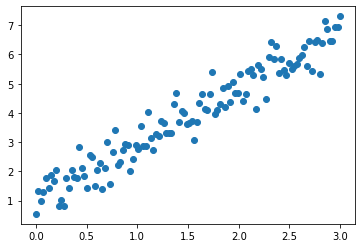

In [108]:
np.random.seed(13) # pick the seed for reproducability - change it to explore the effects of random variations

train_x = np.linspace(0, 3, 120)
train_labels = 2 * train_x + 0.9 + np.random.randn(*train_x.shape) * 0.5

plt.scatter(train_x,train_labels)

Линейная регрессия вычисляется как $f_{W,b}(x) = Wx+b$, где $W, b$ - параметры модели, которые необходимо найти. Функция ошибки на наборе данных $\{x_i,y_u\}_{i=1}^N$ может быть определена как среднеевадратичное отклонение
$$
\mathcal{L}(W,b) = {1\over N}\sum_{i=1}^N (f_{W,b}(x_i)-y_i)^2
$$

Опишем модель и функцию ошибки:

In [155]:
input_dim = 1
output_dim = 1
learning_rate = 0.1

# This is our weight matrix
w = tf.Variable([[100.0]])
# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def f(x):
  return tf.matmul(x,w) + b

def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

Обучать модель будем на сериях примеров - minibatches. Для обучения используем градиентный спуск, подстраивая парметры в соответствии с формулой:
$$
\begin{array}{l}
W^{(n+1)}=W^{(n)}-\eta\frac{\partial\mathcal{L}}{\partial W} \\
b^{(n+1)}=b^{(n)}-\eta\frac{\partial\mathcal{L}}{\partial b} \\
\end{array}
$$

In [156]:
def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = f(x)
    loss = compute_loss(y, predictions)
    # Note that `tape.gradient` works with a list as well (w, b).
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

Теперь приступаем к обучению: делаем несколько проходов по всему датасету (эпох), разбиваем его на minibatches, и вызываем функцию обучения:

In [157]:
# Shuffle the data.
indices = np.random.permutation(len(train_x))
features = tf.constant(train_x[indices],dtype=tf.float32)
labels = tf.constant(train_labels[indices],dtype=tf.float32)

In [158]:
batch_size = 4
for epoch in range(10):
  for i in range(0,len(features),batch_size):
    loss = train_on_batch(tf.reshape(features[i:i+batch_size],(-1,1)),tf.reshape(labels[i:i+batch_size],(-1,1)))
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 25.8437
Epoch 1: last batch loss = 2.7339
Epoch 2: last batch loss = 0.8117
Epoch 3: last batch loss = 0.6134
Epoch 4: last batch loss = 0.5835
Epoch 5: last batch loss = 0.5772
Epoch 6: last batch loss = 0.5756
Epoch 7: last batch loss = 0.5752
Epoch 8: last batch loss = 0.5750
Epoch 9: last batch loss = 0.5750


In [161]:
w,b

(<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[1.8223488]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.9938898], dtype=float32)>)

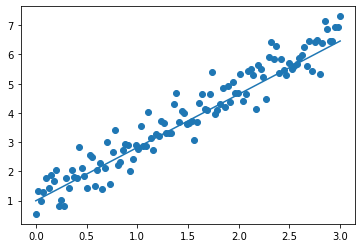

In [160]:
plt.scatter(train_x,train_labels)
x = np.array([min(train_x),max(train_x)])
y = w.numpy()[0,0]*x+b.numpy()[0]
plt.plot(x,y)

## Вычислительный граф

Для проведения вычислений Tensorflow строит внутри себя вычислительный граф, который, в т.ч., может вычисляться на GPU. Однако в нашем случае, поскольку мы использовали пользовательские Python-функции, они не включались в вычислительный граф, и при вычислениях на GPU производилась бы передача данных между GPU и CPU и обратно.

Для ускорения высчислений и построения единого статического графа, необходимо отметить все функции соответствующим декоратором:

In [168]:
@tf.function
def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = f(x)
    loss = compute_loss(y, predictions)
    # Note that `tape.gradient` works with a list as well (w, b).
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

## Dataset API

Для работы с данными в Tensorflow присутствует удобное API, которым мы в данном случае можем воспользоваться:

In [169]:
w.assign([[10.0]])
b.assign([0.0])

# Create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((train_x.astype(np.float32), train_labels.astype(np.float32)))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(tf.reshape(x,(-1,1)), tf.reshape(y,(-1,1)))
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 173.4585
Epoch 1: last batch loss = 13.8459
Epoch 2: last batch loss = 4.5407
Epoch 3: last batch loss = 3.7364
Epoch 4: last batch loss = 3.4334
Epoch 5: last batch loss = 3.1790
Epoch 6: last batch loss = 2.9458
Epoch 7: last batch loss = 2.7311
Epoch 8: last batch loss = 2.5332
Epoch 9: last batch loss = 2.3508


## Пример
Рассмотрим пример двухмерной задачи классификации на 2 класса. Примером такой задачи может быть классификация опухоли на 2 типа - доброкачественная и злокачественная, в зависимости от её размера и возраста.

Сгенерируем тестовые данные случайным образом:


In [313]:
np.random.seed(0) # pick the seed for reproducability - change it to explore the effects of random variations

n = 100
X, Y = make_classification(n_samples = n, n_features=2,
                           n_redundant=0, n_informative=2, flip_y=0.2,class_sep=1)
X = X.astype(np.float32)
Y = Y.astype(np.int32)

split = [ 70*n//100, (15+70)*n//100 ]
train_x, valid_x, test_x = np.split(X, split)
train_labels, valid_labels, test_labels = np.split(Y, split)

In [314]:
def plot_dataset(features, labels, W=None, b=None):
    # prepare the plot
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('$x_i[0]$ -- (feature 1)')
    ax.set_ylabel('$x_i[1]$ -- (feature 2)')
    colors = ['r' if l else 'b' for l in labels]
    ax.scatter(features[:, 0], features[:, 1], marker='o', c=colors, s=100, alpha = 0.5)
    if W is not None:
        min_x = min(features[:,0])
        max_x = max(features[:,1])
        min_y = min(features[:,1])*(1-.1)
        max_y = max(features[:,1])*(1+.1)
        cx = np.array([min_x,max_x],dtype=np.float32)
        cy = (0.5-W[0]*cx-b)/W[1]
        ax.plot(cx,cy,'g')
        ax.set_ylim(min_y,max_y)
    fig.show()

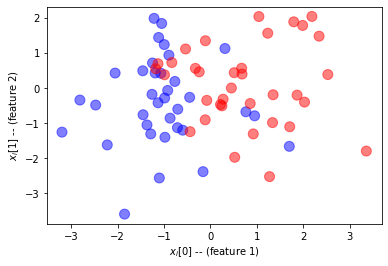

In [315]:
plot_dataset(train_x, train_labels)

## Обучение простейшего одноуровневого персептрона вручную

Используем возможности tensorflow по вычислению градиента для обучения одноуровневого персептрона.

Для начала, задаём архитектуру сети, в которой будет 2 входа и один выход. Соответственно, матрица весов $W$ будет иметь размерность $2\times1$, а вектор сдвига $b$ -- $1$.

Функция обучение будет такая же, как в прошлом примере, но функция ошибки будет представлять собой логистическую функцию ошибки. Для этого нам нужно получить на выходе сети значение **вероятности** класса 1, т.е. необходимо привести выход сети $z$ к диапазону [0,1] с помощью передаточной функции `sigmoid`: $p=\sigma(z)$.
Далее, если для примера с номером класса $y_i\in\{0,1\}$ был получен выход сети $p_i$, то ошибка вычисляется как $\mathcal{L_i}=-y_i\log p_i + (1-y_i)log(1-p_i)$. 

В Tensorflow оба эти этапа (применение сигмоиды и взятие логистической функции ошибки) делается одним вызовом `sigmoid_cross_entropy_with_logits`. Поскольку мы делаем обучение по минибатчам, то необходимо усреднить ошибку по всем компонентам минибатча с помощью `reduce_mean`. 

In [228]:
W = tf.Variable(tf.random.normal(shape=(2,1)))
b = tf.Variable(tf.zeros(shape=(1,),dtype=tf.float32))

learning_rate = 0.1

@tf.function
def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    z = tf.matmul(x, W) + b
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=z))
    dloss_dw, dloss_db = tape.gradient(loss, [W, b])
  W.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

Далее, разбиваем входные данные на минибатчи по 16 элементов, и по-очереди проводим обучение, подстраивая веса $W$ и $b$

In [229]:
# Create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((train_x, train_labels.astype(np.float32)))
dataset = dataset.batch(16)

for epoch in range(15):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(tf.reshape(x,(-1,2)), tf.reshape(y,(-1,1)))
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.7060
Epoch 1: last batch loss = 0.6271
Epoch 2: last batch loss = 0.5706
Epoch 3: last batch loss = 0.5304
Epoch 4: last batch loss = 0.5018
Epoch 5: last batch loss = 0.4814
Epoch 6: last batch loss = 0.4668
Epoch 7: last batch loss = 0.4562
Epoch 8: last batch loss = 0.4485
Epoch 9: last batch loss = 0.4430
Epoch 10: last batch loss = 0.4389
Epoch 11: last batch loss = 0.4359
Epoch 12: last batch loss = 0.4338
Epoch 13: last batch loss = 0.4323
Epoch 14: last batch loss = 0.4313


Для демонстрации того, как сработало обучение, построим граничную прямую $W\times x + b = 0.5$

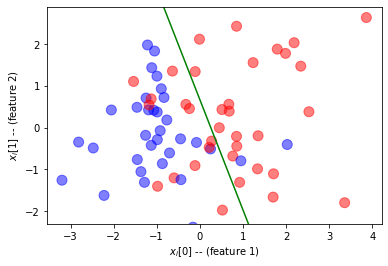

In [230]:
plot_dataset(train_x,train_labels,W.numpy(),b.numpy())

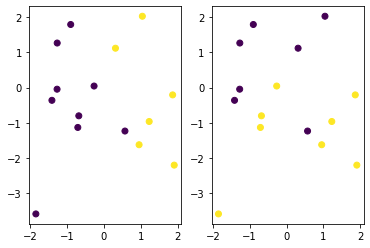

In [252]:
pred = tf.matmul(valid_x,W)+b
fig,ax = plt.subplots(1,2)
ax[0].scatter(valid_x[:,0],valid_x[:,1],c=pred[:,0]>0.5)
ax[1].scatter(valid_x[:,0],valid_x[:,1],c=valid_labels)

In [269]:
tf.reduce_mean(tf.cast(((pred[0]>0.5)==valid_labels),tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=0.46666667>

## Используем оптимизаторы TensorFlow

Tensorflow достаточно плотно интегрирован с библиотекой Keras, которая содержит в себе множество полезного. Например, мы можем использовать оптимизаторы, реализующие немного другие алгоритмы обучения, чем градиентный спуск.

Также попробуем выводить точность на всех этапах обучения.

In [311]:
optimizer = tf.keras.optimizers.Adam(0.01)

learning_rate = 0.05

W = tf.Variable(tf.random.normal(shape=(2,1)))
b = tf.Variable(tf.zeros(shape=(1,),dtype=tf.float32))

@tf.function
def train_on_batch(x, y):
  vars = [W, b]
  with tf.GradientTape() as tape:
    z = tf.sigmoid(tf.matmul(x, W) + b)
    loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(z,y))
    correct_prediction = tf.equal(tf.round(y), tf.round(z))
    acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    grads = tape.gradient(loss, vars)
    optimizer.apply_gradients(zip(grads,vars))
  return loss,acc

for epoch in range(40):
  for step, (x, y) in enumerate(dataset):
    loss,acc = train_on_batch(tf.reshape(x,(-1,2)), tf.reshape(y,(-1,1)))
  print('Epoch %d: last batch loss = %.4f, acc = %.4f' % (epoch, float(loss),acc))

Epoch 0: last batch loss = 10.5965, acc = 0.1667
Epoch 1: last batch loss = 10.4798, acc = 0.1667
Epoch 2: last batch loss = 10.3554, acc = 0.1667
Epoch 3: last batch loss = 10.2228, acc = 0.1667
Epoch 4: last batch loss = 10.0817, acc = 0.1667
Epoch 5: last batch loss = 9.9320, acc = 0.1667
Epoch 6: last batch loss = 9.7742, acc = 0.1667
Epoch 7: last batch loss = 9.6087, acc = 0.1667
Epoch 8: last batch loss = 9.4364, acc = 0.1667
Epoch 9: last batch loss = 9.2584, acc = 0.3333
Epoch 10: last batch loss = 9.0760, acc = 0.1667
Epoch 11: last batch loss = 8.8906, acc = 0.1667
Epoch 12: last batch loss = 8.7036, acc = 0.1667
Epoch 13: last batch loss = 8.5164, acc = 0.1667
Epoch 14: last batch loss = 8.3302, acc = 0.1667
Epoch 15: last batch loss = 8.1461, acc = 0.1667
Epoch 16: last batch loss = 7.9649, acc = 0.1667
Epoch 17: last batch loss = 7.7872, acc = 0.1667
Epoch 18: last batch loss = 7.6135, acc = 0.1667
Epoch 19: last batch loss = 7.4440, acc = 0.3333
Epoch 20: last batch loss

**Задание 1**: Постройте графики ошибок на обучающей и тестовой выборке в процессе обучения

**Задание 2**: Попробуйте решить задачу классификации на датасете MNIST с помощью этого кода. Подсказка: используйте `softmax_crossentropy_with_logits` или `sparse_softmax_cross_entropy_with_logits` в качестве функции ошибки. При этом в первом случае на выход сети необходимо подавать целевые значения в формате *one hot encoding*, а во втором - в виде целочисленного номера класса.

## Keras
### Deep Learning for Humans

* Раньше работал поверх Tensorflow, CNTK или Theano, сейчас включен в состав Tensorflow
* Оперирует нейросетями на уровне слоёв
* Включает упрощённый "обучатель", средства работы с типовыми данными (картинками, ...)
* Много готовых примеров
* Functional API vs. Sequential API

Keras даёт более высокоуровневое API для реализации нейросетей, позволяя определять нейросети как комбинации слоёв и оперировать понятиями "модель", "слой", "алгоритм обучения".

Книжка от создателя Keras: [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python)

In [316]:
train_labels

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1], dtype=int32)

In [336]:
inputs = tf.keras.Input(shape=(2,))
z = tf.keras.layers.Dense(1,kernel_initializer='glorot_uniform',activation='sigmoid')(inputs)
model = tf.keras.models.Model(inputs,z)
train_x_norm = train_x-np.min(train_x) / (np.max(train_x)-np.min(train_x))
model.compile(tf.keras.optimizers.Adam(0.1),'binary_crossentropy',['accuracy'])
model.summary()
model.fit(train_x_norm,train_labels,batch_size=8,epochs=15)

Model: "model_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_50 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
9/9 [==============================] - 0s 1ms/step - loss: 1.2161 - accuracy: 0.2724
Epoch 2/15
9/9 [==============================] - 0s 1ms/step - loss: 0.6994 - accuracy: 0.5658
Epoch 3/15
9/9 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.7799
Epoch 4/15
9/9 [==============================] - 0s 1ms/step - loss: 0.4479 - accuracy: 0.8545
Epoch 5/15
9/9 [==============================] - 0s 1ms/step - loss: 0.4293 - accuracy: 0.8194
Epoch 6/15
9/9 [==============================

Выше мы использовали **функциональный** способ задания модели, когда мы сначала описываем входную переменную, затем - происходящие с ней преобразования, и потом определяем объект `Model`.

Мы можем также задавать модель как последовательности слоёв с помощью `Sequential`:

In [337]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(5,activation='sigmoid',input_shape=(2,)))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(tf.keras.optimizers.Adam(0.1),'binary_crossentropy',['accuracy'])
model.summary()
model.fit(train_x_norm,train_labels,batch_size=8,epochs=15)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 5)                 15        
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
9/9 [==============================] - 0s 1ms/step - loss: 0.6695 - accuracy: 0.6118
Epoch 2/15
9/9 [==============================] - 0s 1ms/step - loss: 0.5108 - accuracy: 0.8211
Epoch 3/15
9/9 [==============================] - 0s 1ms/step - loss: 0.4689 - accuracy: 0.8662
Epoch 4/15
9/9 [==============================] - 0s 1ms/step - loss: 0.3556 - accuracy: 0.8976
Epoch 5/15
9/9 [==============================] - 0s 2ms/step - loss: 0.3588 - accuracy: 0.8991
Epoch 6/15
9/9 [=======================

## Выводы

* Tensorflow позволяет более гибко определять структуру графа вычислений, описывать свои функции и конфигурации.
* Есть более удобные средства для работы с данными (`td.Data`), со слоями (`tf.layers`)
* Для массового использования нейросетей Google рекомендует **Keras**, который позволяет собирать нейросети как конструктор
* При этом возможно реализовать свой слой для Keras, и потом использовать его в своих моделях.
* Для типовых задач имеет смысл использовать Keras
* Также стоит посмотреть на PyTorch, это "восходящая звезда"

Хороший Notebook про Keras и Tensorflow 2.0 от создателя Keras - [тут](https://t.co/k694J95PI8)